### Obtaining a dataset

For this exercise we'll use a dataset from the Machine Learning Repository hosted by The University of California att Irvine. You can view the complete repository [here](https://archive.ics.uci.edu/ml/index.php). We'll be using the __Adult__ dataset, which contains information from the 1994 US census. The fields in the dataset are

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* Income level: <=50K or >50K

We can use this dataset to investigate and graph out various things, using Numpy and matplotlib.

In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from io import StringIO

raw_data = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data').text
print(raw_data[:100])


39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 


The data is in CSV format. We can store this in a numpy matrix using the `loadtxt` method. This method, per the documentation, requires that the input be a filename, a generator, or a list of string. A generator or a list will work equally well here.

In [2]:
raw_data = raw_data.replace(", ", ",")
data = raw_data.split("\n")
dataset = np.loadtxt(data, dtype=str, encoding=str, delimiter=',')
print(dataset.shape)
print(dataset.dtype)
print(type(dataset))
print(type(dataset[0]))
print(dataset[1])

(32561, 15)
<U26
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['50' 'Self-emp-not-inc' '83311' 'Bachelors' '13' 'Married-civ-spouse'
 'Exec-managerial' 'Husband' 'White' 'Male' '0' '0' '13' 'United-States'
 '<=50K']


### Analyzing the Data

Now that we have the dataset we can begin our analysis. To start with, try counting the number of people with a bachelors degree (or higher) that have an income level above \\$50,000 and how many have an income level less than \\$50,000, and creating a simple bar chart illustrating the difference.

In [3]:
'''what are the unique education values - want to be able to determine level of education achieved'''
degreeVals=[]
for row in dataset:
    degreeVals.append(row[3])
    
print(np.unique(degreeVals))

['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


In [4]:
'''what are the unique income values'''
incomeVals=[]
for row in dataset:
    incomeVals.append(row[14])
    
print(np.unique(incomeVals))

['<=50K' '>50K']


In [5]:
'''what are the unique marital values'''
maritalVals=[]
for row in dataset:
    maritalVals.append(row[5])
    
print(np.unique(maritalVals))

['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


In [6]:
def isBachelorOrAbove(education):
    above = ['Bachelors','Doctorate','Masters']
    if education in above:
        return True
    else:
        return False

In [7]:
''' is each unique value a bachelors or higher'''
val = isBachelorOrAbove('Doctorate')
print(val)
val = isBachelorOrAbove('5th-6th')
print(val)

True
False


In [8]:
def isMarried(status):
    married = ['Married-AF-spouse','Married-civ-spouse','Married-spouse-absent']
    if status in married:
        return True
    else:
        return False

In [9]:
''' is each unique value Married'''
print(isMarried('Married-spouse-absent'))
val = isMarried('Married-spouse-absent')
print(val)
print(isMarried('Widowed'))

True
True
False


3486 Bachelor or better making more than 50k
4005 Bachelor or better making 50k or less
4355 less than Bachelor making more than 50k
20715 less than Bachelor making 50k or less
32561
32561


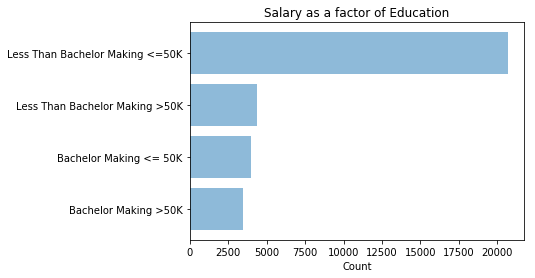

In [13]:
'''Set vals for the analysis'''
bachelorAbove50k = 0 #count education bachelor or above making more than 50k
bachelorBelow50k = 0 #count education bachelor or above making less than 50k
noBachelorAbove50k = 0 #count education less than bachelor making more than 50k
noBachelorBelow50k = 0 #count education less than bachelor making less than 50k
marriedBachelorAbove50k = 0 #count education bachelor or above making more than 50k
marriedBachelorBelow50k = 0 #count education bachelor or above making less than 50k
marriedNoBachelorAbove50k = 0 #count education less than bachelor making more than 50k
marriedNoBachelorBelow50k = 0 #count education less than bachelor making less than 50k
occupation = [] #saving for later analyis

totalRows = 0
isMarriedVal = False
for row in dataset:
    totalRows+=1
    isMarriedVal=isMarried(row[5])
    if isBachelorOrAbove(row[3]):
        if row[14] == '>50K':
            bachelorAbove50k+=1
            if isMarriedVal:
                marriedBachelorAbove50k+=1
            occupation.append(row[1])
        else:
            bachelorBelow50k+=1
            if isMarriedVal:
                marriedBachelorBelow50k+=1
            
    else:
        if row[14] == '>50K':
            noBachelorAbove50k+=1
            if isMarriedVal:
                marriedNoBachelorAbove50k+=1
        else:
            noBachelorBelow50k+=1
            if isMarriedVal:
                marriedNoBachelorBelow50k+=1
        
print(str(bachelorAbove50k) + ' Bachelor or better making more than 50k')
print(str(bachelorBelow50k) + ' Bachelor or better making 50k or less')
print(str(noBachelorAbove50k) + ' less than Bachelor making more than 50k')
print(str(noBachelorBelow50k) + ' less than Bachelor making 50k or less')
assert((bachelorAbove50k + bachelorBelow50k + noBachelorAbove50k + noBachelorBelow50k) == totalRows)
print(bachelorAbove50k + bachelorBelow50k + noBachelorAbove50k + noBachelorBelow50k)
print(totalRows)

education = ('Bachelor Making >50K', 'Bachelor Making <= 50K', 'Less Than Bachelor Making >50K', 'Less Than Bachelor Making <=50K')
y_pos = np.arange(len(education))
performance = [bachelorAbove50k,bachelorBelow50k,noBachelorAbove50k,noBachelorBelow50k]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, education)
plt.xlabel('Count')
plt.title('Salary as a factor of Education')
 
plt.show()
            
            






Next, determine which of the occupations is the most likely to net you more than \\$50,000 a year, and graph the results


In [11]:
print(np.unique(occupation))

['?' 'Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov']


Finally, determine whether marital status is a significant factor in determining income level

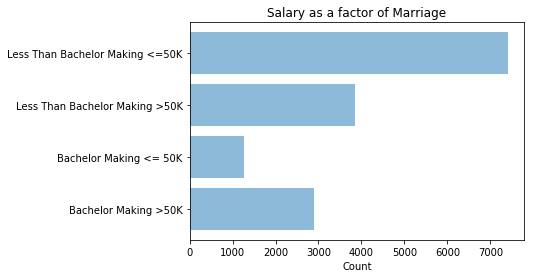

In [12]:

education = ('Bachelor Making >50K', 'Bachelor Making <= 50K', 'Less Than Bachelor Making >50K', 'Less Than Bachelor Making <=50K')
y_pos = np.arange(len(education))
performance = [marriedBachelorAbove50k,marriedBachelorBelow50k,marriedNoBachelorAbove50k,marriedNoBachelorBelow50k]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, education)
plt.xlabel('Count')
plt.title('Salary as a factor of Marriage')
 
plt.show()